In [1]:
import json
import os 
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_dir = 'C:\\Users\\lamec\\WORK\\autolr\\results'

# Initialize an empty list to store data
data = []

# Iterate through all files in the directory
for file_name in os.listdir(results_dir):
    if file_name.endswith('.json'):
        # Extract model name, dataset name, and timestamp from the filename
        parts = file_name.split('_')
        if len(parts) >= 3:
            model_name = parts[0]
            optimizer_name = parts[1]
            timestamp = parts[2].split('.')[0]  # Remove file extension
            
            # Load JSON file content
            file_path = os.path.join(results_dir, file_name)
            with open(file_path, 'r') as json_file:
                json_data = json.load(json_file)
            
            # Extract values for each key and flatten them with epoch indices
            for epoch, (loss, accuracy, val_loss, val_accuracy) in enumerate(zip(
                json_data['loss'], json_data['accuracy'], json_data['val_loss'], json_data['val_accuracy']
            )):
                data.append({
                    'model_name': model_name,
                    'optimizer_name': optimizer_name,
                    'timestamp': timestamp,
                    'Epoch': epoch,
                    'loss': loss,
                    'accuracy': accuracy,
                    'val_loss': val_loss,
                    'val_accuracy': val_accuracy
                })

    

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)
    

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

      model_name optimizer_name   timestamp  Epoch      loss  accuracy  \
0    inceptionv3           Adam  1752599217      0  5.096614   0.03383   
1    inceptionv3           Adam  1752599217      1  4.178119   0.11541   
2    inceptionv3           Adam  1752599217      2  3.691544   0.18337   
3    inceptionv3           Adam  1752599217      3  3.291280   0.24943   
4    inceptionv3           Adam  1752599217      4  2.955353   0.31019   
..           ...            ...         ...    ...       ...       ...   
788        vgg16            SGD  1752583186     11  1.594555   0.58678   
789        vgg16            SGD  1752583186     12  1.299154   0.65507   
790        vgg16            SGD  1752583186     13  1.008264   0.73187   
791        vgg16            SGD  1752583186     14  0.716111   0.80996   
792        vgg16            SGD  1752583186     15  0.479286   0.87642   

      val_loss  val_accuracy  
0    41.935909      0.016204  
1     4.083696      0.140336  
2     5.191770    

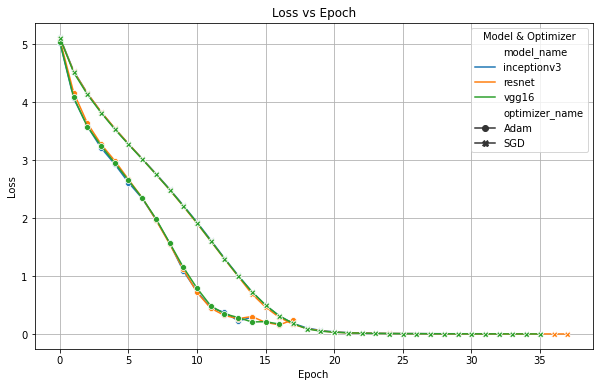

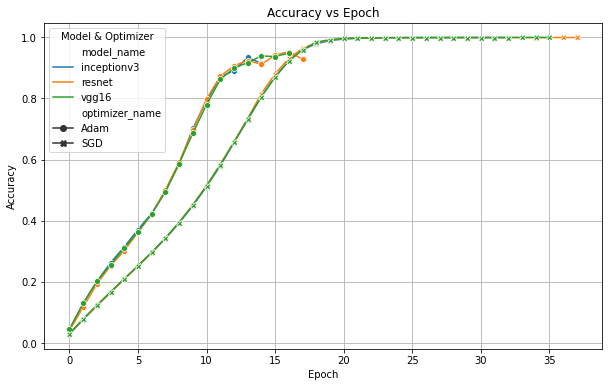

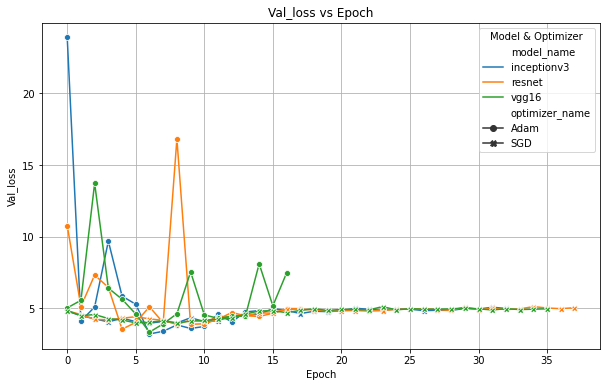

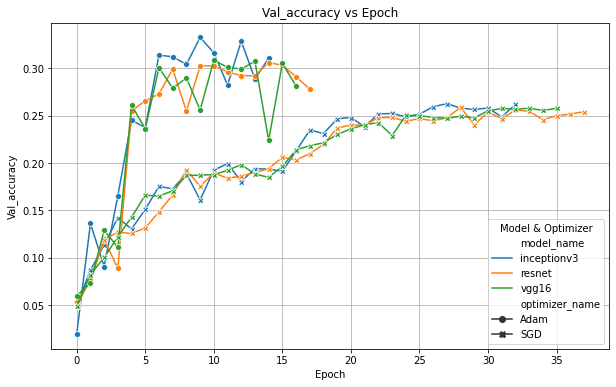

In [3]:

# Group by model_name, optimizer_name, and Epoch, and calculate the mean across timestamps
grouped_df = df.groupby(['model_name', 'optimizer_name', 'Epoch']).mean().reset_index()

# Metrics to plot
metrics = ['loss', 'accuracy', 'val_loss', 'val_accuracy']

# Create plots for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=grouped_df,
        x='Epoch',
        y=metric,
        hue='model_name',
        style='optimizer_name',
        markers=True,
        dashes=False
    )
    plt.title(f'{metric.capitalize()} vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Model & Optimizer')
    plt.grid(True)
    plt.show()